# 1. 데이터 환경 구성

## 1.1 무엇을 분석할 것인가? 데이터 분석을 위한 환경 만들기

### 데이터 찾기

- 공공데이터포털과 같은 웹사이트에서 데이터 분석할 데이터 찾기

### 데이터 분석 환경 구성

- 아나콘다 설치하기

## 1.2 아나콘다 소개 및 주피터 노트북 사용법

### 핵심 키워드

- 주피터 랩/주피터 노트북
- 마크다운
- 셀 추가/편집/삭제
- 커널
- extension

### 주피터 노트북의 다양한 단축키

- enter : 편집상태로 변환
- Shift + Enter : 셀이 실행이 되고 커서가 다음셀로 이동
- Ctrl + Enter : 셀이 실행되고 커서가 그 셀에 유지
- a : 위에 셀 한 개 추가
- b : 아래 셀 한 개 추가
- dd : 셀 삭제
- m : 셀을 마크다운 셀로 변환
- y : 셀을 코드 셀로 변환
- h : 다양한 주피터 노트북의 단축키를 확인

### Tip

- 모르고 셀을 삭제했을 때 Edit에서 undo를 누르면 지웠던 셀이 살아남
- View에서 Toggle Line Numbers 누르면 셀에 번호줄이 보임

# 2. 데이터 분석 준비

## 2.1 데이터 분석을 위한 파이썬 속성 코스

### 핵심 키워드

- import
- boolean
- data type
- list
- for
- if
- len
- split
- join

### Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Strings and List

In [2]:
address = " 경기도 성남시 분당구 불정로 6 NAVER 그린팩토리 16층"

In [3]:
# startswith를 사용하면 특정 문자가 포함되는지 여부를 확인할 수 있습니다.
address.startswith("경기")

False

In [5]:
address_list = address.split()

# 리스트로 분리된 문자열을 다시 연결합니다.
" ".join(address_list)

'경기도 성남시 분당구 불정로 6 NAVER 그린팩토리 16층'

## 2.2 판다스 치트시트를 활용한 기초 익히기

### 핵심 키워드

- pandas
- dataframe
- series
- sort
- drop
- groupby
- pivot table
- plot

### Pandas

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


### Summarize Data

In [31]:
df["a"].value_counts()

a
4    1
5    1
6    1
Name: count, dtype: int64

In [32]:
new_row = pd.DataFrame({"a" : [4], "b" : [9], "c" : [19]})
df = pd.concat([df, new_row])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
0,4,9,19


In [33]:
df['a'].value_counts()

a
4    2
5    1
6    1
Name: count, dtype: int64

### Reshaping

1) "a"컬럼을 기준으로 정렬하기

In [34]:
df["a"].sort_values()

1    4
0    4
2    5
3    6
Name: a, dtype: int64

2) DataFrame 전체에서 "a"값을 기준으로 정렬하기

In [35]:
df.sort_values("a")

,a,b,c
1,4,7,10
0,4,9,19
2,5,8,11
3,6,9,12


3) 역순으로 정렬하기

In [36]:
df.sort_values("a", ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
0,4,9,19


4) "c"컬럼 drop 하기

In [37]:
df = df.drop(["c"], axis=1)
df

,a,b
1,4,7
2,5,8
3,6,9
0,4,9


### Group Data

1) "a" 컬럼값을 Groupby하여 "b"의 컬럼값 평균값 구하기 

In [38]:
df.groupby(["a"])["b"].mean()

a
4    8.0
5    8.0
6    9.0
Name: b, dtype: float64

2) pivot_table로 평균값 구하기

In [39]:
# "a" 컬럼에 있는 값이 4가 두 개가 있기 때문에 그 값의 평균값이 적용
pd.pivot_table(df, index="a")

,b
a,
4,8.0
5,8.0
6,9.0


### Plotting

1) 꺾은선 그래프 그리기

<Axes: >

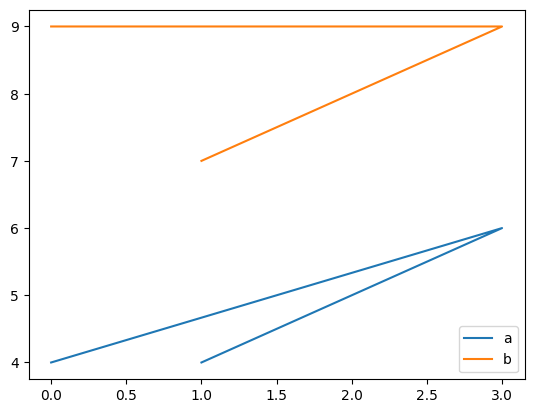

In [40]:
df.plot()

2) 막대그래프 그리기

<Axes: >

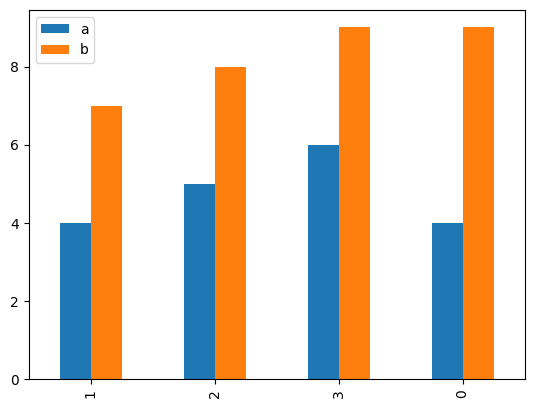

In [41]:
df.plot.bar()

3) 밀도함수 그리기

<Axes: ylabel='Density'>

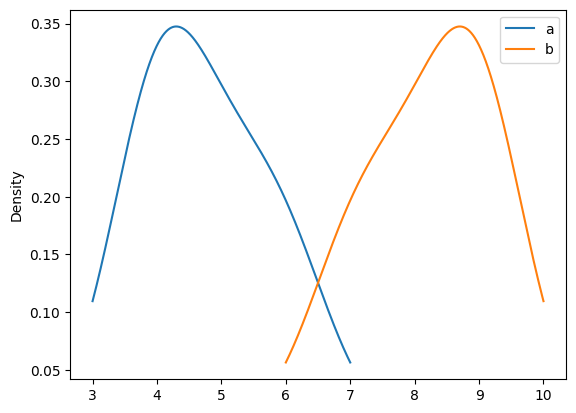

In [42]:
df.plot.density()

## 2.3 파일 경로 설정 방법

### 핵심 키워드

- %mv
- %pwd
- %ls
- pd.read_csv
- cp949

1) 'file-path-setting'의 이름을 가진 주피터 노트북 파일을 만들어 줍니다.
2) 아래의 공공데이터포털(도로교통공단_교통사고 정보)로 들어가셔서 데이터를 다운받아 줍니다.
3) 다운받은 파일을 주피터 노트북에서 작업하고 있는 폴더로 가져오기
    ```python
    %mv /Users/~~~/~~~/도로교통공단_교통사고다발지역_20191010.csv .
    ```
4) 판다스로 csv파일 불러오기
    ```python
    pd.read_csv("도로교통공단_교통사고다발지역_20191010.csv", encoding="cp949")
    ```
5) 데이터 파일의 경우 따로 폴더를 만들어서 관리하는 것을 추천드립니다.
    - csv파일을 불러올 때 한글파일 인코딩을 하지 않으면 오류가 나기 때문에 encoding="cp949"를 함께 적어주셔야 합니다.
    - "euc-kr"을 적는 방법도 있지만 일부 한글은 깨지기 때문에 "cp949"를 사용하시는 것을 추천

In [46]:
pd.read_csv("data/도로교통공단_사망 교통사고 정보_20231231.csv", encoding="cp949")

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X,발생위치Y,경도,위도
0,2023,2023-01-01 07:00,주,일,1,0,0,0,0,충북,...,기타,안전운전 의무 불이행,단일로,기타단일로,건설기계,보행자,1015896,1885475,127.678579,36.967573
1,2023,2023-01-01 07:00,주,일,1,0,0,0,0,경남,...,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,1089954,1651437,128.484013,34.853623
2,2023,2023-01-01 10:00,주,일,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,1181459,1784728,129.514309,36.042531
3,2023,2023-01-01 14:00,주,일,1,0,0,0,0,경기,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,943961,1915763,126.868199,37.239046
4,2023,2023-01-01 18:00,야,일,1,0,0,0,0,경기,...,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,974470,1970403,127.210265,37.732883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,2023,2023-12-31 03:00,야,일,1,0,0,0,0,경기,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,931197,1967305,126.719489,37.702733
2464,2023,2023-12-31 08:00,주,일,1,0,0,0,0,강원,...,기타,안전운전 의무 불이행,교차로,교차로내,화물차,화물차,1095703,2021093,128.592780,38.185021
2465,2023,2023-12-31 11:00,주,일,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,1061423,1768007,128.180706,35.906771
2466,2023,2023-12-31 21:00,야,일,1,0,0,0,0,충남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,970432,1870067,127.168430,36.828348
